# myAOAnet

In [1]:
import os
from os.path import join
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, accuracy_score
%matplotlib inline

## IQ data visualization

In [94]:
iq_data0 = pd.read_csv(join('data_0107', 'iq_example', 'log_long.csv'), sep=',', header=0)

In [95]:
iq_data = iq_data0.drop(iq_data0.columns[[index for index in range(11)]], axis = 1, inplace = False)
iq_data.shape

(20, 262144)

In [120]:
sample_id = 14
iq_data_np = iq_data.to_numpy()[sample_id, :]

In [121]:
iq_arr = iq_data_np.reshape(4, 32768, 2)

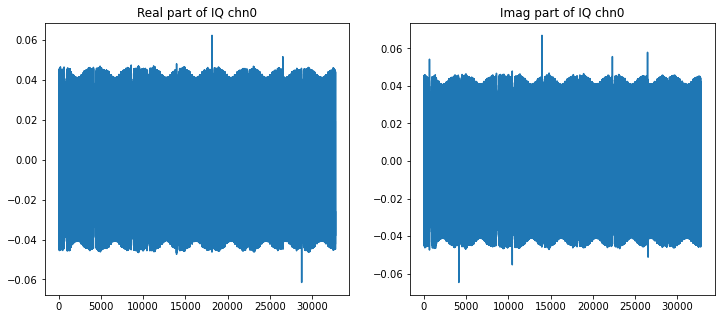

In [143]:
chn = 0

fig0 ,ax0 = plt.subplots(1, 2,figsize=(12,5))
ax0[0].plot(iq_arr[chn, :, 0])
ax0[0].set_title("Real part of IQ chn0")
ax0[1].plot(iq_arr[chn, :, 1])
ax0[1].set_title("Imag part of IQ chn0")
plt.show()

In [144]:
iq_amp = np.zeros((32768, 4))
iq_amp = np.sqrt(iq_arr[:, :, 0]**2 + iq_arr[:, :, 1]**2)
iq_amp.shape

(4, 32768)

In [145]:
iq_phase2 = np.zeros((32768, 4))
iq_phase2 = np.angle(iq_arr[:, :, 0] + iq_arr[:, :, 1]*1j)
iq_phase2.shape

(4, 32768)

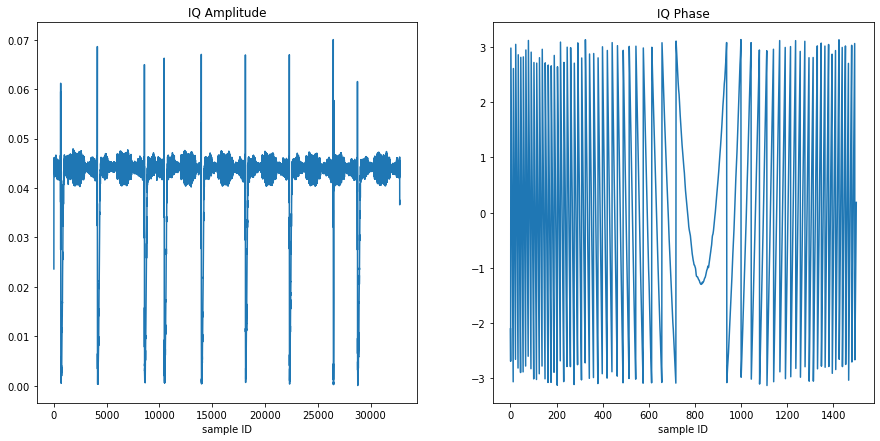

In [146]:
fig ,ax = plt.subplots(1, 2,figsize=(15,7))
ax[0].plot(iq_amp[chn, :])
ax[0].set_title("IQ Amplitude")
ax[0].set_xlabel("sample ID")
ax[1].plot(iq_phase2[chn, 11900:13400])
ax[1].set_title("IQ Phase")
ax[1].set_xlabel("sample ID")
plt.show()

## R-AOA Dataframe

In [92]:
data_dir = 'data_0107'
aoa_dict = {}
#fields_lst = ['field.data0', 'field.data1', 'field.data2', 'field.data3', 'field.data5', 'field.data6', 'field.data7', 'field.data10', 'field.data11', 'field.data15']
fields_lst = ['field.data0', 'field.data1', 'field.data2', 'field.data3', 'field.data4', 'field.data5', 'field.data6', 'field.data7', \
              'field.data10', 'field.data11', 'field.data12', 'field.data13', 'field.data14', 'field.data15', \
              'field.data20', 'field.data21', 'field.data22', 'field.data23', \
              'field.data30', 'field.data31']

for filename in os.listdir(data_dir):
    if filename.startswith("deg_m") and filename.endswith(".csv"):
        aoa = pd.read_csv(join(data_dir, filename), sep=',', header=0)
        aoa_Rjk = aoa[fields_lst]
        aoa_dict[- float(filename[5:-4])] = aoa_Rjk
    elif filename.startswith("deg_") and filename.endswith(".csv"):
        aoa = pd.read_csv(join(data_dir, filename), sep=',', header=0)
        aoa_Rjk = aoa[fields_lst]
        aoa_dict[float(filename[4:-4])] = aoa_Rjk

In [93]:
num_fields = aoa_dict[0].shape[1]
aoa_dict[-30].head(50)

,field.data0,field.data1,field.data2,field.data3,field.data4,field.data5,field.data6,field.data7,field.data10,field.data11,field.data12,field.data13,field.data14,field.data15,field.data20,field.data21,field.data22,field.data23,field.data30,field.data31
0,2.218384e-08,0.0,4.574540e-09,-2.481569e-09,-2.078699e-08,1.040972e-08,-9.252610e-09,2.899709e-09,0.000004,0.0,-7.133984e-08,1.222854e-08,-4.110253e-08,-3.006148e-09,0.000005,0.0,3.259350e-07,3.154710e-08,0.000004,0.0
1,2.209637e-08,0.0,2.218705e-09,-2.476177e-09,-1.929481e-08,1.126677e-08,-1.034284e-08,8.486907e-09,0.000004,0.0,-2.422317e-08,-6.973436e-08,-2.914481e-08,-3.403956e-09,0.000005,0.0,3.499991e-07,2.881677e-08,0.000004,0.0
2,2.199891e-08,0.0,2.627813e-09,-1.644048e-10,-1.816651e-08,1.616667e-08,-7.399362e-09,2.507021e-09,0.000004,0.0,-6.600599e-08,2.661761e-08,-2.083914e-08,7.683450e-09,0.000005,0.0,3.256076e-07,8.710050e-08,0.000004,0.0
3,2.196853e-08,0.0,3.410291e-09,-9.078879e-10,-2.337660e-08,1.307702e-08,-9.717780e-09,3.226840e-09,0.000004,0.0,1.606534e-09,3.491681e-08,-2.851653e-08,-1.503604e-08,0.000005,0.0,3.661305e-07,8.852368e-08,0.000004,0.0
4,2.210945e-08,0.0,6.920385e-10,-1.125709e-09,-1.971837e-08,1.423801e-08,-1.338013e-08,4.936177e-09,0.000004,0.0,-4.057629e-08,1.161554e-08,-2.743531e-08,1.730719e-08,0.000005,0.0,3.653973e-07,3.631175e-08,0.000004,0.0
5,2.170597e-08,0.0,1.087544e-09,-2.095303e-09,-1.657225e-08,1.464464e-08,-6.381973e-09,6.544591e-09,0.000004,0.0,-5.763620e-08,4.352787e-08,-1.076881e-08,-4.767837e-08,0.000005,0.0,3.288074e-07,4.948625e-08,0.000004,0.0
6,2.237161e-08,0.0,2.936435e-09,-2.845162e-09,-1.794240e-08,1.352214e-08,-6.854294e-09,4.929741e-09,0.000004,0.0,-4.778344e-08,-3.309696e-08,-3.948931e-08,2.757874e-08,0.000005,0.0,3.700029e-07,7.061168e-08,0.000004,0.0
7,3.114853e-04,0.0,4.489697e-03,-3.248714e-03,4.960809e-03,3.771337e-03,1.421194e-03,5.573222e-03,0.099565,0.0,3.278931e-02,1.061322e-01,-3.758823e-02,9.434803e-02,0.126798,0.0,9.085355e-02,7.100758e-02,0.107437,0.0
8,1.002354e-03,0.0,1.626347e-02,-1.136868e-02,1.656707e-02,1.457210e-02,2.919256e-03,2.016737e-02,0.397905,0.0,1.057085e-01,4.250243e-01,-1.827627e-01,3.580682e-01,0.495225,0.0,3.454067e-01,2.895913e-01,0.421237,0.0
9,1.009887e-03,0.0,1.844397e-02,-7.825680e-03,1.328447e-02,1.769237e-02,-1.470119e-03,2.042687e-02,0.403740,0.0,1.082055e-01,4.273102e-01,-1.861442e-01,3.592137e-01,0.494781,0.0,3.420519e-01,2.928742e-01,0.420827,0.0


In [115]:
#Degree to Radian
for key in aoa_dict.keys():
    aoa_dict[key]['theta'] = key * math.pi / 180

# Show detection of LoRa beacon when Rjk is significant
field_thres = 1e-04

for key in aoa_dict.keys():
    print("%s shape of signal-presenting snapshots = %.01f" % (str(aoa_dict[key][abs(aoa_dict[key]['field.data2']) >= field_thres].shape), key))

(226, 21) shape of signal-presenting snapshots = 0.0
(248, 21) shape of signal-presenting snapshots = 60.0
(195, 21) shape of signal-presenting snapshots = -50.0
(238, 21) shape of signal-presenting snapshots = -60.0
(182, 21) shape of signal-presenting snapshots = -40.0
(203, 21) shape of signal-presenting snapshots = 20.0
(225, 21) shape of signal-presenting snapshots = 70.0
(214, 21) shape of signal-presenting snapshots = 40.0
(186, 21) shape of signal-presenting snapshots = 30.0
(270, 21) shape of signal-presenting snapshots = -30.0
(209, 21) shape of signal-presenting snapshots = -70.0
(222, 21) shape of signal-presenting snapshots = -20.0
(255, 21) shape of signal-presenting snapshots = 10.0
(259, 21) shape of signal-presenting snapshots = -10.0
(233, 21) shape of signal-presenting snapshots = 50.0


/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
# Differentiate R of LoRa signal or noise
aoa_sig, aoa_noi = {}, {}
sig_index_lst = {}

for key in aoa_dict.keys():
    aoa_sig[key] = aoa_dict[key].drop(aoa_dict[key][abs(aoa_dict[key]['field.data2']) < field_thres].index)
    aoa_noi[key] = aoa_dict[key].drop(aoa_dict[key][abs(aoa_dict[key]['field.data2']) >= field_thres].index)
    
    sig_index_lst[key] = (aoa_dict[key][abs(aoa_dict[key]['field.data2']) >= field_thres].index)
    
sig_index_lst[-10]

Int64Index([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
            ...
            805, 806, 807, 808, 809, 810, 811, 812, 813, 814],
           dtype='int64', length=259)

In [117]:
# Save sig_index!
import pickle

with open(join(data_dir, 'df_collection', 'sig_index.pkl'), "wb") as a_file:
    pickle.dump(sig_index_lst, a_file)

In [118]:
import pickle

with open(join(data_dir, 'df_collection', 'sig_index.pkl'), "rb") as a_file:
    sig_index_lst = pickle.load(a_file)

In [119]:
# Xaoa = aoa_sig <-> theta[Rad]
Xaoa = pd.concat([aoa_sig[rad] for rad in range(-70, 80, 10)], keys=[rad for rad in range(-70, 80, 10)], names=['Series name', 'Row ID'])
idx = pd.IndexSlice

In [120]:
print(Xaoa.shape)
Xaoa.loc[idx[[-10, 0, 30, 70], :], :]
Xaoa

(3365, 21)


field.data0  field.data1  field.data2  field.data3  \
Series name Row ID                                                       
-70         0          0.000046          0.0     0.002728     0.000348   
            1          0.000032          0.0     0.002230     0.000289   
            2          0.000008          0.0     0.000627     0.000079   
            27         0.000004          0.0     0.000310     0.000150   
            28         0.000120          0.0    -0.000454    -0.003152   
...                         ...          ...          ...          ...   
 70         707        0.002506          0.0     0.003383     0.023918   
            708        0.002359          0.0     0.003174     0.022460   
            709        0.001897          0.0     0.002347     0.017940   
            710        0.001451          0.0     0.001547     0.013673   
            711        0.000982          0.0     0.000807     0.009173   

                    field.data4  field.data5  field.data6  field.data7  \
Series name Row ID                                                       
-70         0          0.001615    -0.000416     0.001171    -0.000044   
            1          0.001354    -0.000339     0.001016    -0.000039   
            2          0.000384    -0.000098     0.000293    -0.000017   
            27         0.000223     0.000034     0.000113     0.000085   
            28        -0.000799    -0.001858     0.000271    -0.001878   
...                         ...          ...          ...          ...   
 70         707       -0.016969     0.003560     0.009624    -0.030561   
            708       -0.016128     0.003234     0.009060    -0.029390   
            709       -0.013109     0.002452     0.008144    -0.025374   
            710       -0.010135     0.001830     0.006969    -0.020548   
            711       -0.006896     0.001067     0.005356    -0.014184   

                    field.data10  field.data11  ...  field.data13  \
Series name Row ID                              ...                 
-70         0           0.165659           0.0  ...     -0.037592   
            1           0.161718           0.0  ...     -0.037243   
            2           0.050502           0.0  ...     -0.011764   
            27          0.028097           0.0  ...     -0.005342   
            28          0.165926           0.0  ...     -0.029510   
...                          ...           ...  ...           ...   
 70         707         0.233392           0.0  ...      0.166462   
            708         0.218569           0.0  ...      0.157591   
            709         0.172999           0.0  ...      0.126773   
            710         0.130789           0.0  ...      0.097287   
            711         0.086527           0.0  ...      0.065134   

                    field.data14  field.data15  field.data20  field.data21  \
Series name Row ID                                                           
-70         0           0.069720     -0.011793      0.061505           0.0   
            1           0.072078     -0.012540      0.062923           0.0   
            2           0.023049     -0.004381      0.020062           0.0   
            27          0.011273      0.002239      0.011953           0.0   
            28          0.082327      0.023186      0.068399           0.0   
...                          ...           ...           ...           ...   
 70         707        -0.278442     -0.132870      0.120211           0.0   
            708        -0.267317     -0.125657      0.114910           0.0   
            709        -0.229677     -0.108304      0.093950           0.0   
            710        -0.186047     -0.087480      0.073229           0.0   
            711        -0.127907     -0.061592      0.049657           0.0   

                    field.data22  field.data23  field.data30  field.data31  \
Series name Row ID                                                           
-70         0           0

In [121]:
Xaoa.to_csv(join(data_dir, 'df_collection', 'Xraw.csv'), index=True, header=True)

### MUSIC

In [122]:
# Notice Noisy Rosbags do not contain 'kerberos/doa_results'
#data_dir = 'data_0107'
music_dict = {}

for filename in os.listdir(data_dir):
    if filename.startswith("music_deg_m") and filename.endswith(".csv"):
        music_deg = pd.read_csv(join(data_dir, filename), sep=',', header=0)
        music_deg.rename(columns = {'field.data': 'music'}, inplace=True)
        music_series = music_deg['music']
        music_dict[- float(filename[11:-4])] = music_series
    elif filename.startswith("music_deg_") and filename.endswith(".csv"):
        music_deg = pd.read_csv(join(data_dir, filename), sep=',', header=0)
        music_deg.rename(columns = {'field.data': 'music'}, inplace=True)
        music_series = music_deg['music']
        music_dict[float(filename[10:-4])] = music_series

In [123]:
for key in music_dict.keys():
    music_dict[key] = music_dict[key][sig_index_lst[key]]

In [124]:
# Add MUSIC_results as 22nd column
Xmusic = pd.concat([music_dict[rad] for rad in range(-70, 80, 10)], keys=[rad for rad in range(-70, 80, 10)], names=['Series name', 'Row ID'])
Xaoa_music = pd.concat([Xaoa, Xmusic], axis=1)
Xmusic

Series name  Row ID
-70          0           2.0
             1           2.0
             2           2.0
             27        359.0
             28        359.0
                       ...  
 70          707       331.0
             708       331.0
             709       331.0
             710       331.0
             711       331.0
Name: music, Length: 3365, dtype: float64

In [125]:
print(data_dir)
Xmusic.to_csv(join(data_dir, 'df_collection', 'music_series.csv'), index=True, header=True)

data_1606


In [126]:
Xaoa_music.to_csv(join(data_dir, 'df_collection', 'Xaoa_music.csv'), index=True, header=True)

## Create Origin-Noisy-MUSIC dataset

In [2]:
#field_thres = 1e-04

def create_dataset(dirname, sigma, Xmusic, sig_index_lst):
    aoa_dict = {}
    #fields_lst = ['field.data0', 'field.data1', 'field.data2', 'field.data3', 'field.data5', 'field.data6', 'field.data7', 'field.data10', 'field.data11', 'field.data15']
    fields_lst = ['field.data0', 'field.data1', 'field.data2', 'field.data3', 'field.data4', 'field.data5', 'field.data6', 'field.data7', \
                  'field.data10', 'field.data11', 'field.data12', 'field.data13', 'field.data14', 'field.data15', \
                  'field.data20', 'field.data21', 'field.data22', 'field.data23', \
                  'field.data30', 'field.data31']

    for filename in os.listdir(dirname):
        if filename.startswith("deg_m") and filename.endswith("_" + sigma + ".csv"):
            aoa = pd.read_csv(join(dirname, filename), sep=',', header=0)
            aoa_Rjk = aoa[fields_lst]
            aoa_dict[- float(filename[5:-9])] = aoa_Rjk
        elif filename.startswith("deg_") and filename.endswith("_" + sigma + ".csv"):
            aoa = pd.read_csv(join(dirname, filename), sep=',', header=0)
            aoa_Rjk = aoa[fields_lst]
            aoa_dict[float(filename[4:-9])] = aoa_Rjk
    
    aoa_sig, aoa_noi = {}, {}
    #sig_index_lst = {}
            
    for key in aoa_dict.keys():
        aoa_dict[key]['theta'] = key * math.pi / 180
        #print(key ,aoa_dict[key].shape)
        #print(sig_index_lst[key])
        
        # Patch: cut positional idx that are out-of-bound
        #slice_idx = sig_index_lst[key]
        #slice_idx = slice_idx[slice_idx<len(sig_index_lst[key])]
        try:
            aoa_sig[key] = aoa_dict[key].iloc[sig_index_lst[key], :]
        except IndexError:
            aoa_sig[key] = aoa_dict[key].iloc[sig_index_lst[key][:-3], :]
    
    Xaoa_noi = pd.concat([aoa_sig[rad] for rad in range(-70, 80, 10)], \
                     keys=[rad for rad in range(-70, 80, 10)], names=['Series name', 'Row ID'])
    
    Xaoa_noi_music = pd.concat([Xaoa_noi, Xmusic], axis=1)
    return Xaoa_noi_music
    

In [3]:
# trick: slice pd.Int64Index
sig_index_lst[10][:-1]

NameError: name 'sig_index_lst' is not defined

In [3]:
import pickle

def get_X_list(dirname):
    Xaoa_music = pd.read_csv(join(dirname, 'df_collection', 'Xaoa_music.csv'), index_col=[0, 1])
    Xnoisy_parts = [Xaoa_music]
    with open(join(dirname, 'df_collection', 'sig_index.pkl'), "rb") as a_file:
        sig_index_lst = pickle.load(a_file)
        
    Xmusic = pd.read_csv(join(dirname, 'df_collection', 'music_series.csv'), index_col=[0, 1])
    
    for noi_dir in ['noisy1', 'noisy2', 'noisy3', 'noisy4', 'noisy5']:
        noisy_dir = join(dirname, noi_dir)
        
        Xnoisy_parts.append(create_dataset(noisy_dir, '1e_5', Xmusic, sig_index_lst))
        Xnoisy_parts.append(create_dataset(noisy_dir, '5e_5', Xmusic, sig_index_lst))
        Xnoisy_parts.append(create_dataset(noisy_dir, '1e_4', Xmusic, sig_index_lst))
        Xnoisy_parts.append(create_dataset(noisy_dir, '5e_4', Xmusic, sig_index_lst))

    return Xnoisy_parts

X_0207 = get_X_list('data_0207')
X_0107 = get_X_list('data_0107')
X_1606 = get_X_list('data_1606')

/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [27]:
X = X_1606 + X_0107 + X_0207
#X = X_1606
X[0].head(50)

field.data0  field.data1  field.data2  field.data3  \
Series name Row ID                                                       
-70         0          0.000046          0.0     0.002728     0.000348   
            1          0.000032          0.0     0.002230     0.000289   
            2          0.000008          0.0     0.000627     0.000079   
            27         0.000004          0.0     0.000310     0.000150   
            28         0.000120          0.0    -0.000454    -0.003152   
            29         0.000464          0.0    -0.006122    -0.000039   
            30         0.000519          0.0    -0.005092     0.006812   
            31         0.000481          0.0    -0.001118     0.009971   
            32         0.000110          0.0    -0.001813     0.003157   
            33         0.000306          0.0    -0.001411     0.006338   
            34         0.000440          0.0    -0.003908     0.007889   
            35         0.000183          0.0    -0.004913     0.002114   
            36         0.000171          0.0    -0.004778    -0.000071   
            37         0.000083          0.0    -0.002738     0.000520   
            62         0.000017          0.0     0.000267     0.001363   
            63         0.000026          0.0     0.000441     0.002146   
            64         0.000027          0.0     0.000320     0.002174   
            65         0.000027          0.0     0.000323     0.002192   
            67         0.000025          0.0    -0.000258     0.002088   
            68         0.000026          0.0    -0.000198     0.002168   
            69         0.000027          0.0    -0.000210     0.002180   
            70         0.000028          0.0    -0.000325     0.002218   
            71         0.000029          0.0    -0.000324     0.002257   
            97         0.000081          0.0    -0.000377     0.002160   
            98         0.000250          0.0    -0.001002     0.006749   
            99         0.000278          0.0    -0.001334     0.006926   
            100        0.000294          0.0    -0.002543     0.006389   
            101        0.000325          0.0    -0.002967     0.006436   
            102        0.000312          0.0    -0.003206     0.006053   
            103        0.000296          0.0    -0.002719     0.006425   
            104        0.000231          0.0    -0.001191     0.006488   
            105        0.000091          0.0    -0.000425     0.004148   
            106        0.000033          0.0    -0.000961     0.002254   
            107        0.000011          0.0    -0.000493     0.000759   
            132        0.000042          0.0    -0.002234     0.000601   
            133        0.000048          0.0    -0.002613     0.000817   
            134        0.000043          0.0    -0.002466     0.000855   
            135        0.000040          0.0    -0.002334     0.000967   
            136        0.000038          0.0    -0.002255     0.000990   
            137        0.000035          0.0    -0.002146     0.001036   
            138        0.000030          0.0    -0.001981     0.000976   
            139        0.000013          0.0    -0.001196     0.000858   
            140        0.000009          0.0    -0.000144     0.001211   
            141        0.000015          0.0     0.000350     0.001639   
            168        0.000090          0.0    -0.000154     0.004235   
            169        0.000065          0.0    -0.000323     0.003515   
            170        0.000061          0.0    -0.000270     0.003450   
            171        0.000067          0.0    -0.000166     0.003600   
            173        0.000066          0.0    -0.000262     0.003581   
            174        0.000066          0.0    -0.000185     0.003614   

                    field.data4  field.data5  field.data6  field.data7  \
Series name Row ID                                                       
-70         0          

In [165]:
new_col = ['r11', 'r12', 'r13', 'r14', 'r22', 'r23', 'r24', 'r33', 'r34', 'r44']
fields_lst = ['field.data0', 'field.data1', 'field.data2', 'field.data3', 'field.data4', 'field.data5', 'field.data6', 'field.data7', \
                  'field.data10', 'field.data11', 'field.data12', 'field.data13', 'field.data14', 'field.data15', \
                  'field.data20', 'field.data21', 'field.data22', 'field.data23', \
                  'field.data30', 'field.data31']

def create_Xphs_Xamp(X):
    Xdata = X[fields_lst]
    Xnew = X.drop(fields_lst, axis=1)
    Xamp = Xnew.copy(deep=True)
    
    for i, col in enumerate(new_col):
        
        val = np.angle(Xdata.iloc[:, 2*i] + 1j*Xdata.iloc[:, 2*i+1])
        Xnew.insert(loc=i, column=col, value=val)
        
        amp = np.sqrt(Xdata.iloc[:, 2*i]**2 + Xdata.iloc[:, 2*i+1]**2)
        Xamp.insert(loc=i, column=col, value=amp)
        
    return Xnew, Xamp

In [166]:
Xphs, Xamp = [], []
for item in X:
    phs, amp = create_Xphs_Xamp(item)
    Xphs.append(phs)
    Xamp.append(amp)

In [167]:
len(Xphs)

63

In [19]:
# Save 'Xphs' of Rjk instead
#Xphs.to_csv(join(data_dir, 'df_collection', 'PHS_LOS_ALL.csv'), index=True, header=True)

In [20]:
# Save Real & Image parts of Rjk
#X.to_csv(join(data_dir, 'df_collection', 'LOS_ALL.csv'), index=True, header=True)

### Save/Load DataFrame

In [11]:
# Save X (a list)
idx = pd.IndexSlice
X[0].loc[idx[-30, :50], :]

r11       r12       r13       r14  r22       r23  \
Series name Row ID                                                     
-30         0       0.0 -0.654232  0.334826  0.619421  0.0  0.993830   
            1       0.0 -0.632061  0.376224  0.681775  0.0  1.012814   
            2       0.0 -0.597607  0.426742  0.736460  0.0  1.028719   
            3       0.0 -0.587369  0.423507  0.756605  0.0  1.014552   
            4       0.0 -0.640684  0.345121  0.704756  0.0  0.990026   
            5       0.0 -0.716873  0.281446  0.659192  0.0  1.001910   
            6       0.0 -0.617886  0.524061  0.826423  0.0  1.144598   
            7       0.0 -0.585956  0.687768  0.985597  0.0  1.274605   
            8       0.0 -0.584948  0.684667  0.996417  0.0  1.270190   
            9       0.0 -0.586948  0.665075  0.967695  0.0  1.253105   
            34      0.0 -0.646645  0.581190  0.870321  0.0  1.229359   
            35      0.0 -0.635057  0.575978  0.837469  0.0  1.212531   
            36      0.0 -0.633474  0.552618  0.823331  0.0  1.187984   
            37      0.0 -0.633302  0.528535  0.803337  0.0  1.163987   
            38      0.0 -0.636966  0.506880  0.789404  0.0  1.146074   
            39      0.0 -0.642172  0.494656  0.796327  0.0  1.139148   
            40      0.0 -0.632222  0.486980  0.777689  0.0  1.121659   
            41      0.0 -0.636402  0.475183  0.768554  0.0  1.114235   
            42      0.0 -0.645747  0.469995  0.768009  0.0  1.118213   
            43      0.0 -0.639255  0.475486  0.767374  0.0  1.117280   

                         r24  r33       r34  r44     theta  music  
Series name Row ID                                                 
-30         0       1.268066  0.0  0.278534  0.0 -0.523599  351.0  
            1       1.309976  0.0  0.301636  0.0 -0.523599  351.0  
            2       1.331867  0.0  0.307744  0.0 -0.523599  351.0  
            3       1.342545  0.0  0.332080  0.0 -0.523599  351.0  
            4       1.342238  0.0  0.357128  0.0 -0.523599  351.0  
            5       1.371928  0.0  0.374992  0.0 -0.523599  351.0  
            6       1.445059  0.0  0.305027  0.0 -0.523599  350.0  
            7       1.576857  0.0  0.306105  0.0 -0.523599  349.0  
            8       1.587626  0.0  0.321031  0.0 -0.523599  349.0  
            9       1.559269  0.0  0.310066  0.0 -0.523599  349.0  
            34      1.519534  0.0  0.292371  0.0 -0.523599  350.0  
            35      1.473904  0.0  0.263300  0.0 -0.523599  350.0  
            36      1.457564  0.0  0.271816  0.0 -0.523599  350.0  
            37      1.436696  0.0  0.274995  0.0 -0.523599  350.0  
            38      1.425974  0.0  0.282146  0.0 -0.523599  350.0  
            39      1.438178  0.0  0.301421  0.0 -0.523599  350.0  
            40      1.409021  0.0  0.289746  0.0 -0.523599  350.0  
            41      1.403694  0.0  0.292029  0.0 -0.523599  350.0  
            42      1.412517  0.0  0.296646  0.0 -0.523599  350.0  
            43      1.405287  0.0  0.290467  0.0 -0.523599  350.0

In [10]:
import pickle
'''
df_lst = []
sig_idx_lst = []
load_lst = ['data_1606', 'data_0107', 'data_0207']

for load_dir in load_lst:
    for filename in os.listdir(join(load_dir, 'df_collection')):
        if filename.startswith("LOS") and filename.endswith("ALL.csv"):
            print(load_dir, filename)
            Xaoa0 = pd.read_csv(join(load_dir, 'df_collection', filename), index_col=[0, 1])
            df_lst.append(Xaoa0)
            with open(join(load_dir, 'df_collection', 'sig_index.pkl'), "rb") as a_file:
                sig_idx_lst.append(pickle.load(a_file))
'''

'\ndf_lst = []\nsig_idx_lst = []\nload_lst = [\'data_1606\', \'data_0107\', \'data_0207\']\n\nfor load_dir in load_lst:\n    for filename in os.listdir(join(load_dir, \'df_collection\')):\n        if filename.startswith("LOS") and filename.endswith("ALL.csv"):\n            print(load_dir, filename)\n            Xaoa0 = pd.read_csv(join(load_dir, \'df_collection\', filename), index_col=[0, 1])\n            df_lst.append(Xaoa0)\n            with open(join(load_dir, \'df_collection\', \'sig_index.pkl\'), "rb") as a_file:\n                sig_idx_lst.append(pickle.load(a_file))\n'

In [ ]:
# Use R_phase as input instead
df_lst = []
load_lst = ['data_1606', 'data_0107', 'data_0207']

for load_dir in load_lst:
    for filename in os.listdir(join(load_dir, 'df_collection')):
        if filename.startswith("PHS_LOS") and filename.endswith("ALL.csv"):
            print(load_dir, filename)
            Xaoa0 = pd.read_csv(join(load_dir, 'df_collection', filename), index_col=[0, 1])
            df_lst.append(Xaoa0)

In [24]:
df_lst[2].shape

(54726, 22)

## Preparation

### Create training data with Clean & Noisy datasets

In [35]:
# Corrupt R directly!?
'''
noise = np.random.normal(0, 0.0001, Xaoa.shape)
Xaoa_noisy = Xaoa + noise
'''

In [5]:
def Split_TimeSeries3(Xaoa, aoa_gt_series=range(-70, 80, 10), feature_space=20):
    # Xarr: time series of Rjk
    Xaoa_cpy = Xaoa.copy(deep=True)

    Xarr, ylst = np.empty((0, 3, feature_space), dtype='float32'), []
    rowt_0, rowt_1, rowt_2 = None, None, None
    row_up, row_mid, row_down = -1, -1, -1

    for serName in aoa_gt_series:
        isFirstRow = True
        isSecRow = True
        for rowId, row in Xaoa_cpy.loc[serName].iterrows():
            row_up = row_mid
            rowt_2 = rowt_1
            row_mid = row_down
            rowt_1 = rowt_0
            row_down = rowId
            
            rowt_0 = row.drop(['theta', 'music']).to_numpy(dtype='float32').reshape(1, 1, feature_space)
            if isFirstRow:
                isFirstRow = False
                continue

            if isSecRow:
                isSecRow = False
                continue

            if row_down-row_mid==1 and row_mid-row_up==1:
                arr_tmp = np.concatenate((rowt_2, rowt_1, rowt_0), axis=1)

                Xarr = np.append(Xarr, arr_tmp, axis=0)
                ylst.append([row['theta'], row['music']])

    # Xvec: slice of a Rjk row
    Xvec = Xaoa_cpy.drop(['theta', 'music'], axis=1).to_numpy()
    yvec = Xaoa_cpy[['theta', 'music']].to_numpy()
                
    #print(Xarr.shape, len(ylst))
    return Xarr, ylst, Xvec, yvec

Convert Clean & Noisy Dataframes into Numpy.Array where (3) coherent snapshots should be grouped

In [25]:
# Use R_(real,imag) as input features
Xarr = np.array([])
yarr = np.array([])
Xvec = np.array([])
yvec = np.array([])

for item in X:
    Xarr0, ylst0, Xvec0, yvec0 = Split_TimeSeries3(item)
    
    Xarr = np.concatenate((Xarr, Xarr0), axis=0) if Xarr.size else Xarr0
    Xvec = np.concatenate((Xvec, Xvec0), axis=0) if Xvec.size else Xvec0
    yvec = np.concatenate((yvec, yvec0), axis=0) if yvec.size else yvec0
    yarr0 = np.array(ylst0)
    yarr = np.concatenate((yarr, yarr0), axis=0) if yarr.size else yarr0

print(Xarr.shape)
print(yarr.shape)
print(Xvec.shape)
print(yvec.shape)

(156723, 3, 20)
(156723, 2)
(196602, 20)
(196602, 2)


In [168]:
# Use R_phase data instead
Xarr = np.array([])
yarr = np.array([])
Xvec = np.array([])
yvec = np.array([])

for item in Xphs:
    Xarr0, ylst0, Xvec0, yvec0 = Split_TimeSeries3(item, feature_space=10)
    
    Xarr = np.concatenate((Xarr, Xarr0), axis=0) if Xarr.size else Xarr0
    Xvec = np.concatenate((Xvec, Xvec0), axis=0) if Xvec.size else Xvec0
    yvec = np.concatenate((yvec, yvec0), axis=0) if yvec.size else yvec0
    yarr0 = np.array(ylst0)
    yarr = np.concatenate((yarr, yarr0), axis=0) if yarr.size else yarr0

print(Xarr.shape)
print(yarr.shape)
print(Xvec.shape)
print(yvec.shape)

(156723, 3, 10)
(156723, 2)
(196602, 10)
(196602, 2)


### Split train/test data

In [96]:
Xvec_clean = Xvec[~np.isnan(Xvec).any(axis=1)]
Xvec_clean.shape

(196578, 20)

In [97]:
yvec_clean = yvec[~np.isnan(yvec).any(axis=1)]
yvec_clean.shape

(196578, 2)

In [98]:
# Remove 'NAN' in datasets!
Xarr_clean = Xarr[~np.isnan(Xarr).any(axis=(1,2))]
print(Xarr_clean.shape)
yarr_clean = yarr[~np.isnan(yarr).any(axis=1)]
print(yarr_clean.shape)

(156699, 3, 20)
(156699, 2)


In [108]:
# SHUFFLE!
X_train, X_test, y_train, y_test = train_test_split(Xarr_clean, yarr_clean, test_size=0.25, random_state=42)

In [109]:
y_test.shape

(39175, 2)

In [110]:
# Split Label (theta) and y_train/test_music (music) from yarr
y_test_music = []
for item in y_test:
    if item[1] > 180.0:
        item[1] -= 360
    y_test_music.append(item[1])
y_train_music = []
for item in y_train:
    if item[1] > 180.0:
        item[1] -= 360
    y_train_music.append(item[1])

y_train = [item[0] for item in y_train]
y_test = [item[0] for item in y_test]

In [111]:
print(max(y_train_music), min(y_train_music))

38.0 -38.0


In [112]:
# Normalization
mmsc = MinMaxScaler()
mmsc.fit(X_train.reshape(-1, X_train.shape[-1]))
X_train_std = mmsc.transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_std = mmsc.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [113]:
X_test_std.shape

(39175, 3, 20)

In [114]:
ymax = max(y_train)
ymin = min(y_train)
y_train_std = (y_train - ymin)/(ymax-ymin)
y_test_std = (y_test - ymin)/(ymax-ymin)

In [115]:
y_test_std.shape

(39175,)

## Training
### LSTM

In [14]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add, LSTM, RepeatVector, TimeDistributed
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers, Sequential
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils, plot_model

Using TensorFlow backend.
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zdai/anaconda3/envs/

### FC

In [107]:
def build_fc0(feature_dim = 20):
    

    x = Input(shape=(feature_dim,))
    h1 = Dense(128, activation='relu')(x)
    h2 = Dense(256, activation='relu')(h1)
    h3 = Dense(128, activation='relu')(h2)
    h4 = Dense(64, activation='relu')(h3)
    #h5 = Dense(, activation='relu')(h4)
    r = Dense(1, activation='sigmoid')(h4)
    
    return Model(inputs=x, outputs=r)

model_0 = build_fc0(20)
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model_0.compile(optimizer=optimizer, loss='mse')
model_0.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 20)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               2688      
_________________________________________________________________
dense_24 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total params: 76,929
Trainable params: 76,929
Non-trainable params: 0
______________________________________________________

In [116]:
epochs = 100
batch_size = 128

history_model_0 = model_0.fit(X_train_std[:, 0, :], y_train_std, batch_size=batch_size, epochs=epochs, \
                    verbose=1, validation_data=(X_test_std[:, 0, :], y_test_std))

Train on 117524 samples, validate on 39175 samples
Epoch 1/100
117524/117524 [==============================] - 2s 14us/step - loss: 0.0886 - val_loss: 0.0870
Epoch 2/100
117524/117524 [==============================] - 1s 12us/step - loss: 0.0857 - val_loss: 0.0844
Epoch 3/100
117524/117524 [==============================] - 1s 12us/step - loss: 0.0832 - val_loss: 0.0820
Epoch 4/100
117524/117524 [==============================] - 1s 12us/step - loss: 0.0809 - val_loss: 0.0798
Epoch 5/100
117524/117524 [==============================] - 1s 12us/step - loss: 0.0787 - val_loss: 0.0775
Epoch 6/100
117524/117524 [==============================] - 1s 12us/step - loss: 0.0763 - val_loss: 0.0750
Epoch 7/100
117524/117524 [==============================] - 1s 13us/step - loss: 0.0738 - val_loss: 0.0724
Epoch 8/100
117524/117524 [==============================] - 1s 12us/step - loss: 0.0713 - val_loss: 0.0699
Epoch 9/100
117524/117524 [==============================] - 1s 12us/step - loss: 0.0

Epoch 76/100
117524/117524 [==============================] - 1s 12us/step - loss: 0.0250 - val_loss: 0.0246
Epoch 77/100
117524/117524 [==============================] - 1s 12us/step - loss: 0.0249 - val_loss: 0.0245
Epoch 78/100
117524/117524 [==============================] - 1s 12us/step - loss: 0.0248 - val_loss: 0.0244
Epoch 79/100
117524/117524 [==============================] - 1s 12us/step - loss: 0.0246 - val_loss: 0.0242
Epoch 80/100
117524/117524 [==============================] - 1s 12us/step - loss: 0.0245 - val_loss: 0.0241
Epoch 81/100
117524/117524 [==============================] - 1s 12us/step - loss: 0.0244 - val_loss: 0.0240
Epoch 82/100
117524/117524 [==============================] - 1s 12us/step - loss: 0.0242 - val_loss: 0.0238
Epoch 83/100
117524/117524 [==============================] - 1s 12us/step - loss: 0.0241 - val_loss: 0.0237
Epoch 84/100
117524/117524 [==============================] - 1s 12us/step - loss: 0.0240 - val_loss: 0.0236
Epoch 85/100
117524

In [118]:
X_test_std[:, 0, :].shape

(39175, 20)

### (1) Window Method

In [119]:
def build_lstm1(feature_dim = 20):
    time_steps = 3
    

    x = Input(shape=(time_steps, feature_dim))
    h1 = LSTM(512, activation='relu')(x)
    r = Dense(1, activation='sigmoid')(h1)
    
    return Model(inputs=x, outputs=r)

In [120]:
model_1 = build_lstm1(20)
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model_1.compile(optimizer=optimizer, loss='mse')
model_1.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3, 20)             0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 512)               1091584   
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 513       
Total params: 1,092,097
Trainable params: 1,092,097
Non-trainable params: 0
_________________________________________________________________


In [121]:
epochs = 20
batch_size = 128

history = model_1.fit(X_train_std, y_train_std, batch_size=batch_size, epochs=epochs, \
                    verbose=1, validation_data=(X_test_std, y_test_std))

Train on 117524 samples, validate on 39175 samples
Epoch 1/20
117524/117524 [==============================] - 18s 154us/step - loss: 0.0893 - val_loss: 0.0887
Epoch 2/20
117524/117524 [==============================] - 18s 155us/step - loss: 0.0884 - val_loss: 0.0878
Epoch 3/20
117524/117524 [==============================] - 18s 155us/step - loss: 0.0875 - val_loss: 0.0869
Epoch 4/20
117524/117524 [==============================] - 18s 157us/step - loss: 0.0866 - val_loss: 0.0861
Epoch 5/20
117524/117524 [==============================] - 19s 159us/step - loss: 0.0858 - val_loss: 0.0852
Epoch 6/20
117524/117524 [==============================] - 18s 157us/step - loss: 0.0850 - val_loss: 0.0845
Epoch 7/20
117524/117524 [==============================] - 19s 159us/step - loss: 0.0842 - val_loss: 0.0837
Epoch 8/20
117524/117524 [==============================] - 19s 160us/step - loss: 0.0835 - val_loss: 0.0830
Epoch 9/20
117524/117524 [==============================] - 19s 157us/step - 

In [122]:
pred_model_1_y_test_std = model_1.predict(X_test_std)
pred_model_1_y_test = pred_model_1_y_test_std*(ymax-ymin) + ymin

rmse_model_1 = np.sqrt(mean_squared_error(y_test, pred_model_1_y_test))
print("RMSE of model_1: ", rmse_model_1)
print("I.E. %.04f degree of mean error" % (rmse_model_1/math.pi*180))

RMSE of model_1:  0.6699986922197125
I.E. 38.3881 degree of mean error


### (2) Stateful LSTM

In [75]:
def build_lstm2():
    # define stateful LSTM
    time_steps = 3
    feature_dim = 20
    batch_size = 1
    
    model = Sequential()
    model.add(LSTM(128, batch_input_shape=(batch_size, time_steps, feature_dim), \
                   stateful=True, return_sequences=True))
    model.add(LSTM(64, batch_input_shape=(batch_size, time_steps, feature_dim), \
                   stateful=True))
    model.add(Dense(1, activation='linear'))
    
    return model

In [76]:
model_2 = build_lstm2()
model_2.compile(optimizer='adam', loss='mse')
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (1, 3, 128)               76288     
_________________________________________________________________
lstm_5 (LSTM)                (1, 64)                   49408     
_________________________________________________________________
dense_3 (Dense)              (1, 1)                    65        
Total params: 125,761
Trainable params: 125,761
Non-trainable params: 0
_________________________________________________________________


In [79]:
epochs = 5
batch_size = 1

for i in range(epochs):
    history = model_2.fit(X_train_std, y_train_std, batch_size=batch_size, epochs=1, \
                    verbose=1, shuffle=False, validation_data=(X_test_std, y_test_std))
    model_2.reset_states()

Train on 65160 samples, validate on 16290 samples
Epoch 1/1
65160/65160 [==============================] - 269s 4ms/step - loss: 1.6946e-04 - val_loss: 2.6879e-05
Train on 65160 samples, validate on 16290 samples
Epoch 1/1
65160/65160 [==============================] - 267s 4ms/step - loss: 2.9427e-05 - val_loss: 1.0305e-05
Train on 65160 samples, validate on 16290 samples
Epoch 1/1
  214/65160 [..............................] - ETA: 4:01 - loss: 3.2629e-05

KeyboardInterrupt: 

In [84]:
pred_model_2_y_test_std = model_2.predict(X_test_std[:320], batch_size=1)
model_2.reset_states()
pred_model_2_y_test = pred_model_2_y_test_std*(ymax-ymin) + ymin

rmse_model_2 = np.sqrt(mean_squared_error(y_test[:320], pred_model_2_y_test[:320]))
print("RMSE of model_2: ", rmse_model_2)
print("I.E. %.04f degree of mean error" % (rmse_model_2/math.pi*180))

RMSE of model_2:  0.01090688845233081
I.E. 0.6249 degree of mean error


### (3) Stacked LSTM

In [82]:
def build_lstm3(feature_dim = 20):
    time_steps = 3
    

    # define model LSTM-only
    x = Input(shape=(time_steps, feature_dim))
    h1 = LSTM(128, activation='relu', return_sequences=True)(x)
    h2 = LSTM(64, activation='relu')(h1)
    #h2 = LSTM(16, activation='relu')(h1)
    #h3 = Dense(9, activation='relu')(h2)
    r = Dense(1, activation='sigmoid')(h2)
    
    return Model(inputs=x, outputs=r)

model_3 = build_lstm3(20)

# Customize LR & Optimizer
'''
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
'''
optimizer = keras.optimizers.SGD(learning_rate=0.001, nesterov=True)

model_3.compile(optimizer=optimizer, loss='mse')
model_3.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3, 20)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 3, 128)            76288     
_________________________________________________________________
lstm_12 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 65        
Total params: 125,761
Trainable params: 125,761
Non-trainable params: 0
_________________________________________________________________


In [83]:
epochs = 200
batch_size = 128

history = model_3.fit(X_train_std2, y_train_std2, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_std2, y_test_std2))

Train on 117521 samples, validate on 39178 samples
Epoch 1/200
117521/117521 [==============================] - 7s 56us/step - loss: 0.0910 - val_loss: 0.0910
Epoch 2/200
117521/117521 [==============================] - 6s 53us/step - loss: 0.0906 - val_loss: 0.0906
Epoch 3/200
117521/117521 [==============================] - 6s 52us/step - loss: 0.0903 - val_loss: 0.0903
Epoch 4/200
117521/117521 [==============================] - 7s 56us/step - loss: 0.0900 - val_loss: 0.0901
Epoch 5/200
117521/117521 [==============================] - 6s 54us/step - loss: 0.0897 - val_loss: 0.0899
Epoch 6/200
117521/117521 [==============================] - 6s 54us/step - loss: 0.0895 - val_loss: 0.0897
Epoch 7/200
117521/117521 [==============================] - 6s 53us/step - loss: 0.0894 - val_loss: 0.0896
Epoch 8/200
117521/117521 [==============================] - 6s 53us/step - loss: 0.0893 - val_loss: 0.0895
Epoch 9/200
117521/117521 [==============================] - 6s 53us/step - loss: 0.0

Epoch 76/200
117521/117521 [==============================] - 6s 54us/step - loss: 0.0802 - val_loss: 0.0803
Epoch 77/200
117521/117521 [==============================] - 7s 60us/step - loss: 0.0799 - val_loss: 0.0800
Epoch 78/200
117521/117521 [==============================] - 6s 55us/step - loss: 0.0796 - val_loss: 0.0797
Epoch 79/200
117521/117521 [==============================] - 6s 53us/step - loss: 0.0793 - val_loss: 0.0794
Epoch 80/200
117521/117521 [==============================] - 6s 53us/step - loss: 0.0790 - val_loss: 0.0791
Epoch 81/200
117521/117521 [==============================] - 6s 54us/step - loss: 0.0787 - val_loss: 0.0787
Epoch 82/200
117521/117521 [==============================] - 6s 55us/step - loss: 0.0784 - val_loss: 0.0784
Epoch 83/200
117521/117521 [==============================] - 6s 54us/step - loss: 0.0780 - val_loss: 0.0781
Epoch 84/200
117521/117521 [==============================] - 7s 57us/step - loss: 0.0777 - val_loss: 0.0777
Epoch 85/200
117521

117521/117521 [==============================] - 6s 53us/step - loss: 0.0441 - val_loss: 0.0438
Epoch 151/200
117521/117521 [==============================] - 6s 52us/step - loss: 0.0437 - val_loss: 0.0435
Epoch 152/200
117521/117521 [==============================] - 6s 55us/step - loss: 0.0434 - val_loss: 0.0431
Epoch 153/200
117521/117521 [==============================] - 6s 52us/step - loss: 0.0431 - val_loss: 0.0428
Epoch 154/200
117521/117521 [==============================] - 7s 56us/step - loss: 0.0427 - val_loss: 0.0425
Epoch 155/200
117521/117521 [==============================] - 6s 53us/step - loss: 0.0424 - val_loss: 0.0422
Epoch 156/200
117521/117521 [==============================] - 7s 56us/step - loss: 0.0421 - val_loss: 0.0419
Epoch 157/200
117521/117521 [==============================] - 6s 52us/step - loss: 0.0418 - val_loss: 0.0416
Epoch 158/200
117521/117521 [==============================] - 6s 54us/step - loss: 0.0416 - val_loss: 0.0413
Epoch 159/200
117521/117

In [123]:
# Save/Load Model

#model_3.save(join("checkpoints", "model_3_stackedLSTM.h5"))
# OR
model_3 = keras.models.load_model(join("checkpoints", "model_3_stackedLSTM.h5"))

dict_keys(['val_loss', 'loss'])


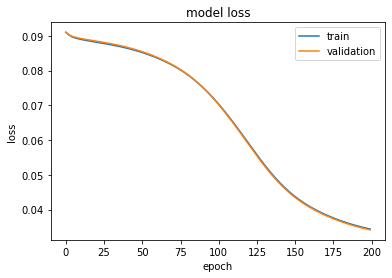

In [85]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [124]:
pred_model_3_y_test_std = model_3.predict(X_test_std)
pred_model_3_y_test = pred_model_3_y_test_std*(ymax-ymin) + ymin
pred_model_3_y_test.shape

(39175, 1)

In [125]:
rmse_lstm_3 = np.sqrt(mean_squared_error(y_test, pred_model_3_y_test))
print("RMSE of Stacked LSTM: ", rmse_lstm_3)
print("I.E. %.04f degree of mean error" % (rmse_lstm_3/math.pi*180))

RMSE of Stacked LSTM:  0.45261904325602426
I.E. 25.9332 degree of mean error


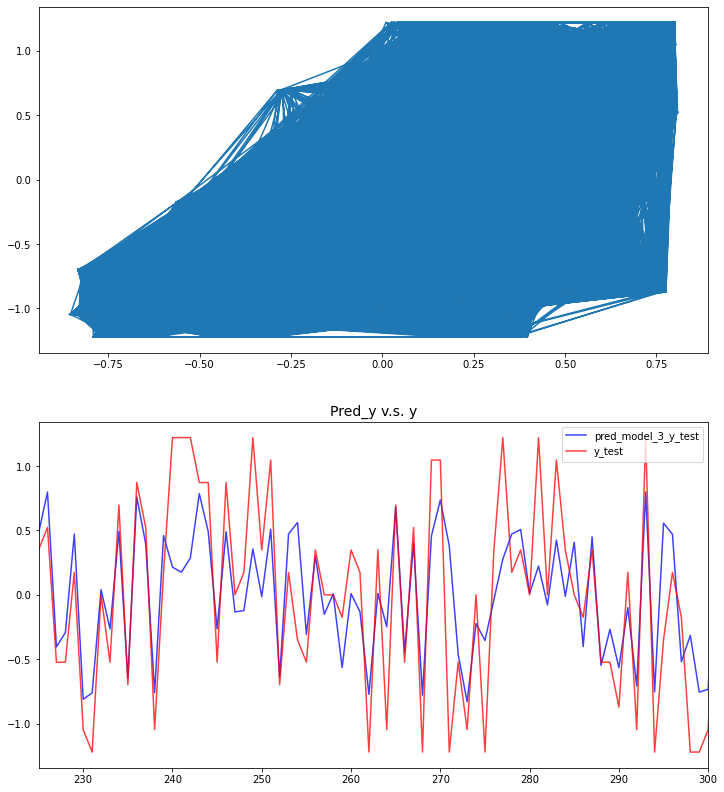

In [126]:
fig ,ax_lst = plt.subplots(2, 1,figsize=(12,14))
ax_lst[0].plot(pred_model_3_y_test, y_test)
ax_lst[1].plot([i for i in range(pred_model_3_y_test.shape[0])], list(pred_model_3_y_test), color='b', alpha=0.75, label='pred_model_3_y_test')
ax_lst[1].plot(y_test, color='red', alpha=0.75, label='y_test')
ax_lst[1].set_title(f"Pred_y v.s. y",fontsize=14)
ax_lst[1].grid(False)
ax_lst[1].legend(loc='upper right')
ax_lst[1].set_xlim([225, 300])
plt.show()

## LSTM-Autoencoder

In [127]:
time_steps = 3
feature_dim = 20

x0 = Input(shape=(time_steps, feature_dim))
l1 = LSTM(128, activation='relu', return_sequences=True)(x0)
l2 = LSTM(64, activation='relu', return_sequences=False)(l1)
h0 = RepeatVector(time_steps)(l2)
l3 = LSTM(64, activation='relu', return_sequences=True)(h0)
l4 = LSTM(128, activation='relu', return_sequences=True)(l3)
r0 = TimeDistributed(Dense(feature_dim))(l4)


LSTM_AE = Model(inputs=x0, outputs=r0)
LSTM_AE_optimizer = keras.optimizers.Adam(learning_rate=0.001)
LSTM_AE.compile(optimizer=LSTM_AE_optimizer, loss='mse')
LSTM_AE.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3, 20)             0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 3, 128)            76288     
_________________________________________________________________
lstm_15 (LSTM)               (None, 64)                49408     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 3, 64)             0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 3, 64)             33024     
_________________________________________________________________
lstm_17 (LSTM)               (None, 3, 128)            98816     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 3, 20)             258

In [128]:
epochs = 10
batch_size = 128

history_lstm_ae = LSTM_AE.fit(X_train_std, X_train_std, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test_std, X_test_std))

Train on 117524 samples, validate on 39175 samples
Epoch 1/10
117524/117524 [==============================] - 13s 114us/step - loss: 0.0226 - val_loss: 0.0016
Epoch 2/10
117524/117524 [==============================] - 12s 106us/step - loss: 0.0010 - val_loss: 7.0647e-04
Epoch 3/10
117524/117524 [==============================] - 12s 106us/step - loss: 5.2336e-04 - val_loss: 3.9491e-04
Epoch 4/10
117524/117524 [==============================] - 13s 111us/step - loss: 3.3716e-04 - val_loss: 2.5442e-04
Epoch 5/10
117524/117524 [==============================] - 13s 112us/step - loss: 2.5148e-04 - val_loss: 2.6318e-04
Epoch 6/10
117524/117524 [==============================] - 13s 108us/step - loss: 2.0418e-04 - val_loss: 1.6918e-04
Epoch 7/10
117524/117524 [==============================] - 13s 108us/step - loss: 1.6758e-04 - val_loss: 1.8035e-04
Epoch 8/10
117524/117524 [==============================] - 13s 108us/step - loss: 1.4816e-04 - val_loss: 1.5777e-04
Epoch 9/10
117524/117524 

In [129]:
pred_X_test_std = LSTM_AE.predict(X_test_std, verbose=0)
print('---Predicted---')
print(np.round(pred_X_test_std, 4))
print('---Actual---')
print(np.round(X_test_std, 4))

---Predicted---
[[[ 9.797e-01 -1.300e-03  8.108e-01 ...  4.722e-01  2.649e-01  5.000e-04]
  [ 9.809e-01 -1.900e-03  8.180e-01 ...  4.740e-01  2.653e-01 -1.000e-04]
  [ 9.888e-01 -1.000e-03  8.178e-01 ...  4.715e-01  2.643e-01  7.000e-04]]

 [[ 3.063e-01 -2.000e-04  1.700e-01 ...  7.438e-01  7.745e-01 -1.700e-03]
  [ 3.076e-01 -1.300e-03  1.761e-01 ...  7.431e-01  7.594e-01 -2.200e-03]
  [ 3.025e-01 -9.000e-04  1.795e-01 ...  7.427e-01  7.622e-01 -1.000e-04]]

 [[ 3.940e-02 -7.000e-04  3.749e-01 ...  9.581e-01  9.803e-01  1.100e-03]
  [ 4.260e-02 -1.100e-03  3.779e-01 ...  9.615e-01  9.834e-01 -0.000e+00]
  [ 4.300e-02 -9.000e-04  3.725e-01 ...  9.612e-01  9.839e-01  0.000e+00]]

 ...

 [[ 5.530e-02  2.700e-03  3.960e-01 ...  6.971e-01  4.789e-01  1.600e-03]
  [ 7.230e-02 -3.100e-03  4.930e-01 ...  8.083e-01  7.900e-01 -3.000e-03]
  [ 7.500e-02 -5.000e-04  4.983e-01 ...  8.093e-01  7.975e-01 -1.500e-03]]

 [[ 3.780e-01 -3.300e-03  4.775e-01 ...  6.897e-01  6.950e-01 -1.900e-03]
  [ 3.81

In [130]:
encoder = Model(inputs=x0, outputs=l2)
encoder.compile(optimizer='adam', loss='mse')
encoder.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3, 20)             0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 3, 128)            76288     
_________________________________________________________________
lstm_15 (LSTM)               (None, 64)                49408     
Total params: 125,696
Trainable params: 125,696
Non-trainable params: 0
_________________________________________________________________


In [131]:
# Predict both Train/Test data for further training the Regressor
pred_encoded_X_train_std = encoder.predict(X_train_std)
pred_encoded_X_test_std = encoder.predict(X_test_std)
pred_encoded_X_test_std.shape

(39175, 64)

### Dense-regressor on Encoded R-features

In [132]:
def build_regressor(feature_dim = 64):
    
    
    x = Input(shape=(feature_dim,))
    h1 = Dense(256, activation='relu')(x)
    h2 = Dense(512, activation='relu')(h1)
    h3 = Dense(256, activation='relu')(h2)
    h4 = Dense(128, activation='relu')(h3)
    r = Dense(1, activation='sigmoid')(h4)
    
    return Model(inputs=x, outputs=r)

model_4 = build_regressor(64)
Regressor_optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_4.compile(optimizer=Regressor_optimizer, loss='mse')
model_4.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_31 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 129       
Total params: 312,577
Trainable params: 312,577
Non-trainable params: 0
____________________________________________________

In [133]:
epochs = 30
batch_size = 128

history_model_4 = model_4.fit(pred_encoded_X_train_std, y_train_std, batch_size=batch_size, epochs=epochs, \
                    verbose=1, validation_data=(pred_encoded_X_test_std, y_test_std))

Train on 117524 samples, validate on 39175 samples
Epoch 1/30
117524/117524 [==============================] - 4s 31us/step - loss: 0.0033 - val_loss: 2.4984e-04
Epoch 2/30
117524/117524 [==============================] - 3s 26us/step - loss: 1.8805e-04 - val_loss: 1.4785e-04
Epoch 3/30
117524/117524 [==============================] - 3s 26us/step - loss: 1.1670e-04 - val_loss: 1.6530e-04
Epoch 4/30
117524/117524 [==============================] - 3s 27us/step - loss: 1.0072e-04 - val_loss: 8.7354e-05
Epoch 5/30
117524/117524 [==============================] - 3s 26us/step - loss: 8.7628e-04 - val_loss: 4.8707e-04
Epoch 6/30
117524/117524 [==============================] - 3s 26us/step - loss: 1.2951e-04 - val_loss: 6.5230e-05
Epoch 7/30
117524/117524 [==============================] - 3s 26us/step - loss: 6.2482e-05 - val_loss: 4.5283e-05
Epoch 8/30
117524/117524 [==============================] - 3s 27us/step - loss: 5.8686e-05 - val_loss: 6.5643e-05
Epoch 9/30
117524/117524 [=======

In [134]:
pred_model_4_y_test_std = model_4.predict(pred_encoded_X_test_std)
pred_model_4_y_test = pred_model_4_y_test_std*(ymax-ymin) + ymin

rmse_model_4 = np.sqrt(mean_squared_error(y_test, pred_model_4_y_test))
print("RMSE of LSTM-AE + 4FC: ", rmse_model_4)
print("I.E. %.04f degree of mean error" % (rmse_model_4/math.pi*180))

RMSE of LSTM-AE + 4FC:  0.02797209814421824
I.E. 1.6027 degree of mean error


In [154]:
# Save and Load models
import pickle

encoder_fc_tuple = (encoder, model_4)

pkl_filename = "encoder_fc_tuple.pkl"
with open(join('checkpoints', pkl_filename), 'wb') as a_file:
    pickle.dump(encoder_fc_tuple, a_file)

In [157]:
pkl_filename = "encoder_fc_tuple.pkl"
with open(join('checkpoints', pkl_filename), 'rb') as a_file:
    encoder_cpy, model_4_cpy = pickle.load(a_file)
    
encoder_cpy.summary()
model_4_cpy.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3, 20)             0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 3, 128)            76288     
_________________________________________________________________
lstm_15 (LSTM)               (None, 64)                49408     
Total params: 125,696
Trainable params: 125,696
Non-trainable params: 0
_________________________________________________________________
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               16640     
__________________________________

### Build end-to-end Encoder+FC model

In [137]:
# Build encoder_fc model
fc1 = Dense(256, activation='relu')(l2)
fc2 = Dense(512, activation='relu')(fc1)
fc3 = Dense(256, activation='relu')(fc2)
fc4 = Dense(128, activation='relu')(fc3)
fc_out = Dense(1, activation='sigmoid')(fc4)

model_encoder_fc = Model(inputs=x0, outputs=fc_out)

Encoder_fc_optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_encoder_fc.compile(optimizer=Encoder_fc_optimizer, loss='mse')
model_encoder_fc.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3, 20)             0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 3, 128)            76288     
_________________________________________________________________
lstm_15 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_40 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_41 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_42 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_43 (Dense)             (None, 128)               328

### SVR on Encoded R-features

In [135]:
# SVR
svr_ae = SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.01)
svr_ae.fit(pred_encoded_X_train_std, y_train)
svr_ae.score(pred_encoded_X_test_std, y_test)

0.9829883088464295

In [75]:
'''
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.5,1]}
grid = GridSearchCV(svr_3,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)
grid.fit(pred_encoded_X_train_std, y_train)
print(grid.best_estimator_)
print(grid.best_score_)
'''

"\nparams = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.5,1]}\ngrid = GridSearchCV(svr_3,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)\ngrid.fit(pred_encoded_X_train_std, y_train)\nprint(grid.best_estimator_)\nprint(grid.best_score_)\n"

In [180]:
with open(join('checkpoints', 'svr_ae.pkl'), 'wb') as a_file:
    pickle.dump(svr_ae, a_file)

In [ ]:
with open(join('checkpoints', 'svr_ae.pkl'), 'rb') as a_file:
    svr_ae = pickle.load(a_file)

In [138]:
pred_EncodeSVR_y_test = svr_ae.predict(pred_encoded_X_test_std)
rmse_svr_ae = np.sqrt(mean_squared_error(y_test, pred_EncodeSVR_y_test))
print("RMSE for LSTM-AE + SVR:", rmse_svr_ae)
print("I.E. %.04f degree of mean error" % (rmse_svr_ae/math.pi*180))

RMSE for LSTM-AE + SVR: 0.09562362322617296
I.E. 5.4788 degree of mean error


In [139]:
len(y_test)

39175

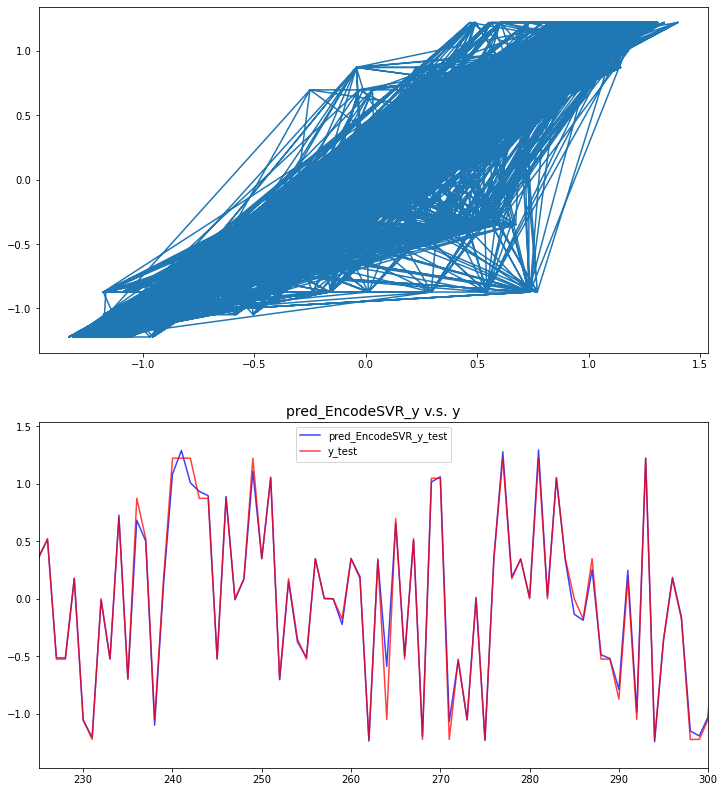

In [140]:
fig ,ax_lst = plt.subplots(2, 1,figsize=(12,14))
ax_lst[0].plot(pred_EncodeSVR_y_test, y_test)
ax_lst[1].plot([i for i in range(pred_EncodeSVR_y_test.shape[0])], list(pred_EncodeSVR_y_test), color='b', alpha=0.75, label='pred_EncodeSVR_y_test')
ax_lst[1].plot(y_test, color='red', alpha=0.75, label='y_test')
ax_lst[1].set_title(f"pred_EncodeSVR_y v.s. y",fontsize=14)
ax_lst[1].grid(False)
ax_lst[1].legend(loc='best')
ax_lst[1].set_xlim([225, 300])
plt.show()

### Visualize CDF

In [141]:
y_err_series = pd.Series(abs(y_test - pred_EncodeSVR_y_test) / math.pi*180)

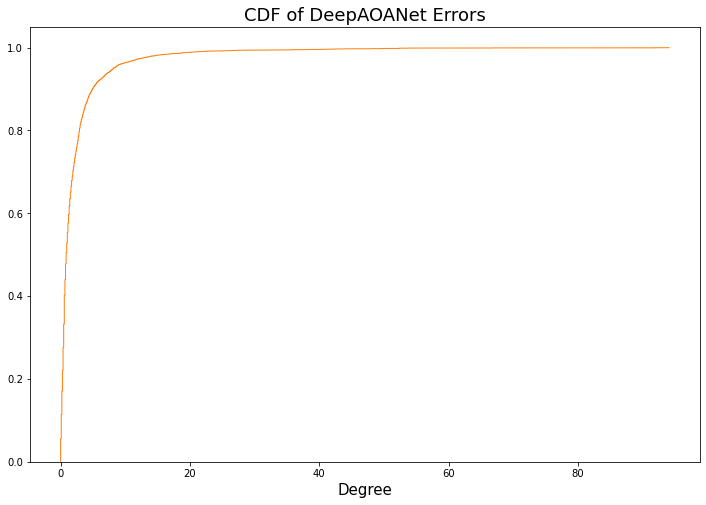

In [142]:
fig_hist, ax_hist = plt.subplots(1,1, figsize=(12,8))
n, bins, patches = ax_hist.hist(y_err_series, density=True, cumulative = True, histtype='step', bins=1000, color='tab:orange')
patches[0].set_xy(patches[0].get_xy()[:-1])
ax_hist.set_title("CDF of DeepAOANet Errors", fontsize=18)
ax_hist.set_xlabel("Degree", fontsize=15)
plt.show()

### Directly apply SVR on Rjk (Optional)

In [144]:
np.argwhere(np.isnan(yvec))

array([[ 89651,      0],
       [ 89652,      0],
       [ 89653,      0],
       [ 93042,      0],
       [ 93043,      0],
       [ 93044,      0],
       [ 96433,      0],
       [ 96434,      0],
       [ 96435,      0],
       [ 99824,      0],
       [ 99825,      0],
       [ 99826,      0],
       [130343,      0],
       [130344,      0],
       [130345,      0],
       [133734,      0],
       [133735,      0],
       [133736,      0],
       [137125,      0],
       [137126,      0],
       [137127,      0],
       [140516,      0],
       [140517,      0],
       [140518,      0]])

In [145]:
Xsingle = Xvec[~np.isnan(Xvec).any(axis=1)]
ysingle0 = yvec[~np.isnan(yvec).any(axis=1)]
ysingle = [item[0] for item in ysingle0]

In [146]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(Xsingle, ysingle, test_size=0.7, random_state=42)

In [147]:
svr_0 = SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.01)
svr_0.fit(X_train0, y_train0)
svr_0.score(X_test0, y_test0)

0.9478677008199085

In [181]:
with open(join('checkpoints', 'svr_0.pkl'), 'wb') as a_file:
    pickle.dump(svr_0, a_file)

In [ ]:
with open(join('checkpoints', 'svr_0.pkl'), 'rb') as a_file:
    svr_0 = pickle.load(a_file)

In [158]:
pred_SVR0_y_test = svr_0.predict(X_test0)
rmse0 = np.sqrt(mean_squared_error(y_test0, pred_SVR0_y_test))
print("RMSE for SVR0:", rmse0)
print("I.E. %.04f degree of mean error" % (rmse0/math.pi*180))

RMSE for SVR0: 0.1685550614164265
I.E. 9.6575 degree of mean error


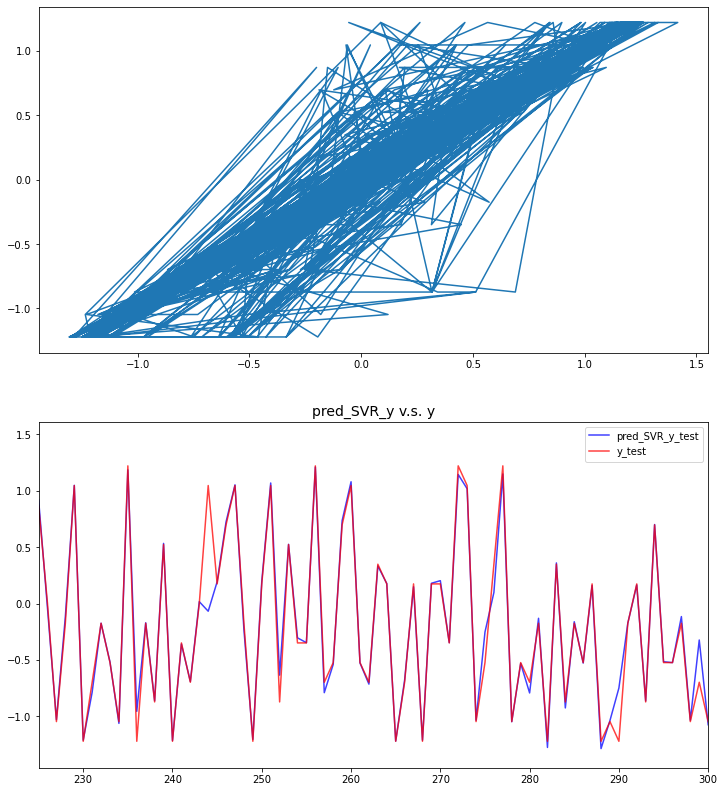

In [162]:
fig0 ,ax_lst0 = plt.subplots(2, 1,figsize=(12,14))
ax_lst0[0].plot(pred_SVR0_y_test[:2000], y_test0[:2000])
ax_lst0[1].plot([i for i in range(pred_SVR0_y_test.shape[0])], list(pred_SVR0_y_test), color='b', alpha=0.75, label='pred_SVR_y_test')
ax_lst0[1].plot(y_test0, color='red', alpha=0.75, label='y_test')
ax_lst0[1].set_title(f"pred_SVR_y v.s. y",fontsize=14)
ax_lst0[1].grid(False)
ax_lst0[1].legend(loc='best')
ax_lst0[1].set_xlim([225, 300])
plt.show()

# CDF

In [163]:
y_err_music_series = pd.Series(abs(y_test[i] / math.pi*180 - y_test_music[i]) for i in range(len(y_test)))

In [164]:
y_err_lstm_ae_svr_series = pd.Series(abs(y_test - pred_EncodeSVR_y_test) / math.pi*180)

In [165]:
y_err_lstm_ae_fc_series = pd.Series(abs(y_test - pred_model_4_y_test.ravel()) / math.pi*180)

In [166]:
y_err_lstm_stacked_lstm_series = pd.Series(abs(y_test - pred_model_3_y_test.ravel()) / math.pi*180)

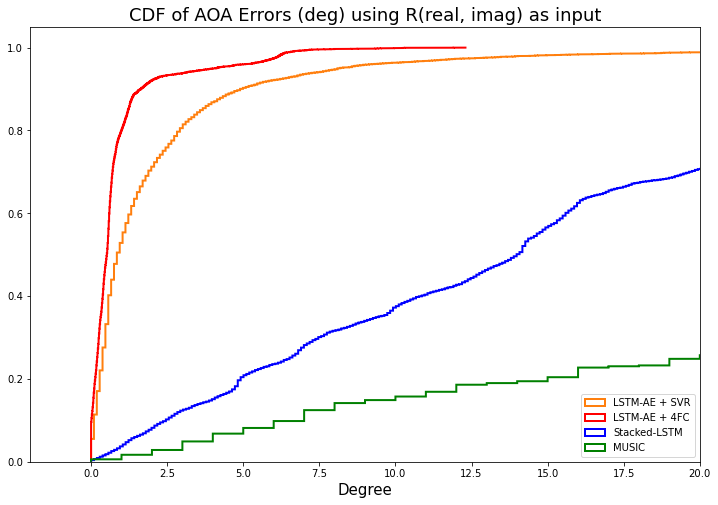

In [168]:
%matplotlib inline
fig_hist, ax_hist = plt.subplots(1,1, figsize=(12,8))

n, bins, patches = ax_hist.hist(y_err_lstm_ae_svr_series, density=True, cumulative = True, histtype='step', \
                                bins=1000, color='tab:orange', linewidth=2, label='LSTM-AE + SVR')
patches[0].set_xy(patches[0].get_xy()[:-1])
n2, bins2, patches2 = ax_hist.hist(y_err_lstm_ae_fc_series, density=True, cumulative = True, histtype='step', \
                                   bins=1000, color='red', linewidth=2, label='LSTM-AE + 4FC')
patches2[0].set_xy(patches2[0].get_xy()[:-1])
n3, bins3, patches3 = ax_hist.hist(y_err_lstm_stacked_lstm_series, density=True, cumulative = True, histtype='step', \
                                   bins=1000, color='b', linewidth=2, label='Stacked-LSTM')
patches3[0].set_xy(patches3[0].get_xy()[:-1])
n4, bins4, patches4 = ax_hist.hist(y_err_music_series, density=True, cumulative = True, histtype='step', \
                                   bins=1000, color='g', linewidth=2, label='MUSIC')
patches4[0].set_xy(patches4[0].get_xy()[:-1])

ax_hist.set_title("CDF of AOA Errors (deg) using R(real, imag) as input", fontsize=18)
ax_hist.set_xlabel("Degree", fontsize=15)
ax_hist.set_xlim(-2, 20)
ax_hist.legend(loc='lower right')

fig_hist.savefig(join('doc', 'CDF_R_real_imag.png'), facecolor="w", bbox_inches='tight')
plt.show()

# Validation
### (1) Unseen NLOS Data [-45, 0, 45]

In [169]:
fields_lst = ['field.data0', 'field.data1', 'field.data2', 'field.data3', 'field.data4', 'field.data5', 'field.data6', 'field.data7', \
              'field.data10', 'field.data11', 'field.data12', 'field.data13', 'field.data14', 'field.data15', \
              'field.data20', 'field.data21', 'field.data22', 'field.data23', \
              'field.data30', 'field.data31']
# Show detection of LoRa beacon when Rjk is significant
field_thres = 1e-04

In [170]:
test_dict = {}
test_dir = join('data_1606', 'test')

for filename in os.listdir(test_dir):
    if filename.startswith("test_m") and filename.endswith(".csv"):
        aoa = pd.read_csv(join(test_dir, filename), sep=',', header=0)
        aoa_Rjk = aoa[fields_lst]
        test_dict[- float(filename[6:-4])] = aoa_Rjk
    elif filename.startswith("test_") and filename.endswith(".csv"):
        aoa = pd.read_csv(join(test_dir, filename), sep=',', header=0)
        aoa_Rjk = aoa[fields_lst]
        test_dict[float(filename[5:-4])] = aoa_Rjk

In [171]:
test_sig = {}
test_sig_index = {}

for key in test_dict.keys():
    test_dict[key]['theta'] = key * math.pi / 180
    test_sig_index[key] = (test_dict[key][abs(test_dict[key]['field.data2']) < field_thres].index)
    test_sig[key] = test_dict[key].iloc[test_sig_index[key], :]

Xtest = pd.concat([test_sig[rad] for rad in test_dict.keys()], \
                 keys=[rad for rad in test_dict.keys()], names=['Series name', 'Row ID'])
Xtest['music'] = pd.Series([0] * len(Xtest.index))

/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [172]:
Xtest_arr, ytest_lst2, Xtest_vec, ytest_vec = Split_TimeSeries3(Xtest, aoa_gt_series=range(-45, 90, 45))

In [173]:
X_train_null, X_test2, y_train_null, y_test2 = train_test_split(Xtest_arr, ytest_lst2, test_size=0.9, random_state=42)

In [174]:
# Normalization
X_test2_std = mmsc.transform(X_test2.reshape(-1, X_test2.shape[-1])).reshape(X_test2.shape)

y_test2_lst = [item[0] for item in y_test2]
y_test2_lst_std = (y_test2_lst - ymin)/(ymax-ymin)

In [175]:
# Stacked LSTM
pred_X_test2_std = model_3.predict(X_test2_std)
pred_X_test2 = pred_X_test2_std*(ymax - ymin) + ymin

pred_X_test2_std.shape

(2655, 1)

In [176]:
rmse_lstm_model_3_test2 = np.sqrt(mean_squared_error(y_test2_lst, pred_X_test2_std))
print("RMSE of Stacked LSTM: ", rmse_lstm_model_3_test2)
print("I.E. %.04f degree of mean error" % (rmse_lstm_model_3_test2/math.pi*180))

RMSE of Stacked LSTM:  0.6654344893211094
I.E. 38.1266 degree of mean error


In [177]:
# Encoder-SVR
pred_EncoderSVR_ytest_lst = svr_ae.predict(encoder.predict(X_test2_std))

rmse_EncoderSVR = np.sqrt(mean_squared_error(y_test2_lst, pred_EncoderSVR_ytest_lst))
print("RMSE of LSTM-Encoder + SVR: ", rmse_EncoderSVR)
print("I.E. %.04f degree of mean error" % (rmse_EncoderSVR/math.pi*180))

RMSE of LSTM-Encoder + SVR:  2.0753656184242626
I.E. 118.9097 degree of mean error


In [179]:
# Encoder-FC
pred_EncoderFC_ytest_lst = model_4.predict(encoder.predict(X_test2_std))

rmse_EncoderFC = np.sqrt(mean_squared_error(y_test2_lst, pred_EncoderFC_ytest_lst))
print("RMSE of LSTM-Encoder + FC: ", rmse_EncoderFC)
print("I.E. %.04f degree of mean error" % (rmse_EncoderFC/math.pi*180))

RMSE of LSTM-Encoder + FC:  0.692823766541133
I.E. 39.6959 degree of mean error


In [178]:
# DirectSVR
X_train_null, X_test2vec, y_train_null, y_test2vec = train_test_split(Xtest_vec, ytest_vec, test_size=0.9, random_state=42)
pred_SVR_y_test2vec2 = svr_0.predict(X_test2vec)
rmse_svronly2 = np.sqrt(mean_squared_error(y_test2vec, pred_SVR_y_test2vec2))
print("RMSE for SVR-Only:", rmse_svronly2)
print("I.E. %.04f degree of mean error" % (rmse_svronly2/math.pi*180))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### (2) Test LOS trained model with NLOS Office data

In [41]:
test_dict = {}
test_dir = join('data_0207')

for filename in os.listdir(test_dir):
    if filename.startswith("deg_m") and filename.endswith(".csv"):
        aoa = pd.read_csv(join(test_dir, filename), sep=',', header=0)
        aoa_Rjk = aoa[fields_lst]
        test_dict[- float(filename[5:-4])] = aoa_Rjk
    elif filename.startswith("deg_") and filename.endswith(".csv"):
        aoa = pd.read_csv(join(test_dir, filename), sep=',', header=0)
        aoa_Rjk = aoa[fields_lst]
        test_dict[float(filename[4:-4])] = aoa_Rjk
        
test_sig = {}
test_sig_index = {}

for key in test_dict.keys():
    test_dict[key]['theta'] = key * math.pi / 180
    test_sig_index[key] = (test_dict[key][abs(test_dict[key]['field.data2']) > field_thres].index)
    test_sig[key] = test_dict[key].iloc[test_sig_index[key], :]

Xtest = pd.concat([test_sig[rad] for rad in test_dict.keys()], \
                 keys=[rad for rad in test_dict.keys()], names=['Series name', 'Row ID'])
Xtest['music'] = pd.Series([0] * len(Xtest.index))

/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [44]:
Xtest

field.data0  field.data1  field.data2  field.data3  \
Series name Row ID                                                       
0.0         0          0.002184          0.0     0.024242    -0.014704   
            1          0.002166          0.0     0.024150    -0.014528   
            2          0.002169          0.0     0.024058    -0.014692   
            3          0.002171          0.0     0.024069    -0.014733   
            4          0.002169          0.0     0.024022    -0.014707   
...                         ...          ...          ...          ...   
50.0        637        0.000784          0.0     0.007978     0.012863   
            638        0.000784          0.0     0.007057     0.013157   
            639        0.000690          0.0     0.006625     0.012229   
            640        0.000020          0.0     0.000179     0.000372   
            667        0.001230          0.0     0.000114     0.014208   

                    field.data4  field.data5  field.data6  field.data7  \
Series name Row ID                                                       
0.0         0          0.018842    -0.022103     0.008571     0.022858   
            1          0.019282    -0.021491     0.010607     0.023123   
            2          0.019153    -0.021621     0.010777     0.023143   
            3          0.019132    -0.021668     0.010839     0.023054   
            4          0.019099    -0.021623     0.010704     0.023129   
...                         ...          ...          ...          ...   
50.0        637        0.002442     0.012756    -0.014876    -0.012695   
            638        0.001327     0.013263    -0.014492    -0.012830   
            639        0.001377     0.012334    -0.014059    -0.011542   
            640        0.000027     0.000367    -0.000431    -0.000343   
            667       -0.006520     0.012460    -0.005782    -0.023604   

                    field.data10  field.data11  ...  field.data14  \
Series name Row ID                              ...                 
0.0         0           0.382914           0.0  ...     -0.060397   
            1           0.381266           0.0  ...     -0.038097   
            2           0.380607           0.0  ...     -0.038430   
            3           0.380544           0.0  ...     -0.037272   
            4           0.380165           0.0  ...     -0.039516   
...                          ...           ...  ...           ...   
50.0        637         0.294454           0.0  ...     -0.358117   
            638         0.286748           0.0  ...     -0.344476   
            639         0.282505           0.0  ...     -0.338084   
            640         0.008470           0.0  ...     -0.010151   
            667         0.165134           0.0  ...     -0.271888   

                    field.data15  field.data20  field.data21  field.data22  \
Series name Row ID                                                           
0.0         0           0.315486      0.402064           0.0     -0.159338   
            1           0.333120      0.400443           0.0     -0.136754   
            2           0.333554      0.399868           0.0     -0.137157   
            3           0.332708      0.399517           0.0     -0.135911   
            4           0.332794      0.399075           0.0     -0.138003   
...                          ...           ...           ...           ...   
50.0        637         0.114198      0.216867           0.0     -0.251985   
            638         0.127069      0.228632           0.0     -0.240742   
            639         0.137503      0.224937           0.0     -0.233434   
            640         0.004912      0.006726           0.0     -0.006816   
            667         0.063695      0.161803           0.0     -0.207622   

                    field.data23  field.data30  field.data31     theta  music  
Series name Row ID                                                             
0.0         0        

In [45]:
Xtest_arr, ytest_lst2, Xtest_vec, ytest_vec = Split_TimeSeries3(Xtest, aoa_gt_series=range(-70, 80, 10))

In [50]:
X_train_null, X_test2, y_train_null, y_test2 = train_test_split(Xtest_arr, ytest_lst2, test_size=0.9, random_state=42)

In [47]:
# Normalization
X_test2_std = mmsc.transform(X_test2.reshape(-1, X_test2.shape[-1])).reshape(X_test2.shape)

y_test2_lst = [item[0] for item in y_test2]
y_test2_lst_std = (y_test2_lst - ymin)/(ymax-ymin)

In [49]:
# Stacked LSTM
pred_X_test2_std = model_3.predict(X_test2_std)
pred_X_test2 = pred_X_test2_std*(ymax - ymin) + ymin

rmse_lstm_model_3_test2 = np.sqrt(mean_squared_error(y_test2_lst, pred_X_test2))
print("RMSE of Stacked LSTM: ", rmse_lstm_model_3_test2)
print("I.E. %.04f degree of mean error" % (rmse_lstm_model_3_test2/math.pi*180))

RMSE of Stacked LSTM:  1.3320435643586526
I.E. 76.3205 degree of mean error


In [53]:
y_test2_lst

[-0.17453292519943295,
 0.5235987755982988,
 -0.17453292519943295,
 -0.3490658503988659,
 -0.3490658503988659,
 0.5235987755982988,
 -0.8726646259971648,
 0.6981317007977318,
 0.5235987755982988,
 1.0471975511965976,
 0.3490658503988659,
 -0.3490658503988659,
 -0.3490658503988659,
 1.2217304763960306,
 0.17453292519943295,
 1.0471975511965976,
 -0.6981317007977318,
 0.8726646259971648,
 -0.6981317007977318,
 0.17453292519943295,
 0.8726646259971648,
 -0.6981317007977318,
 -1.0471975511965976,
 -0.8726646259971648,
 -0.17453292519943295,
 -0.3490658503988659,
 0.8726646259971648,
 -0.6981317007977318,
 0.6981317007977318,
 -0.5235987755982988,
 1.2217304763960306,
 1.2217304763960306,
 1.2217304763960306,
 0.5235987755982988,
 -1.2217304763960306,
 1.2217304763960306,
 0.0,
 0.5235987755982988,
 0.8726646259971648,
 0.17453292519943295,
 -1.2217304763960306,
 0.8726646259971648,
 -0.5235987755982988,
 -0.5235987755982988,
 0.8726646259971648,
 -0.17453292519943295,
 0.3490658503988659,


In [54]:
pred_X_test2

array([[-1.2217257 ],
       [-0.90941834],
       [-1.1571212 ],
       [-1.2071195 ],
       [-1.1537702 ],
       [-1.1023673 ],
       [ 1.2217305 ],
       [-1.2217305 ],
       [-0.777859  ],
       [-0.42798126],
       [-1.2217305 ],
       [-0.6808515 ],
       [-0.11149502],
       [ 0.06831229],
       [ 1.1216381 ],
       [-0.8178073 ],
       [ 0.6642356 ],
       [ 1.1968997 ],
       [ 0.69682336],
       [-1.2031693 ],
       [ 1.2150109 ],
       [ 0.6982554 ],
       [ 1.2046156 ],
       [ 1.2217305 ],
       [-1.214909  ],
       [-1.1507245 ],
       [ 1.1847918 ],
       [ 0.7298708 ],
       [-1.2217305 ],
       [ 0.75265205],
       [ 0.19303572],
       [ 0.08468843],
       [-0.7138485 ],
       [-0.48084223],
       [ 0.57320845],
       [-0.01710653],
       [-1.2217305 ],
       [-0.8746899 ],
       [ 1.1844137 ],
       [ 0.99887514],
       [ 0.5983932 ],
       [ 1.2038863 ],
       [ 0.64963317],
       [ 0.5529945 ],
       [ 1.2020001 ],
       [-0